## 데이터 다운로드

In [71]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"gyunjaewon","key":"b95ad6fda4b8fff20897c14bcddbf4b0"}'}

In [72]:
# Make a directory named kaggle and copy the kaggle. json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [73]:
!kaggle competitions download -c aiffel-dl-thon-dktc-online-14

aiffel-dl-thon-dktc-online-14.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
from zipfile import ZipFile
file_name = "/content/aiffel-dl-thon-dktc-online-14.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


## 데이터 처리

In [75]:
import pandas as pd

# 데이터 읽기
train_data = pd.read_csv('./training.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

In [76]:
train_data.head()

,class,conversation
idx,,
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [77]:
test_data.head()

,text
idx,
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [78]:
# 데이터 프레임 정보 확인 (열, 결측치 등)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4929 entries, 0 to 4928
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         4929 non-null   object
 1   conversation  4929 non-null   object
dtypes: object(2)
memory usage: 115.5+ KB
None


In [79]:

class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
일반 대화           979
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [80]:
# 'class' 열의 고유값별 개수 세기
class_counts = train_data['class'].value_counts()

# 결과 출력
print("클래스별 데이터 개수:\n", class_counts)

# 비율 계산 및 출력
class_proportions = train_data['class'].value_counts(normalize=True) * 100
print("\n클래스별 데이터 비율 (%):\n", class_proportions)

클래스별 데이터 개수:
 class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
일반 대화           979
협박 대화           896
Name: count, dtype: int64

클래스별 데이터 비율 (%):
 class
기타 괴롭힘 대화      22.195171
갈취 대화          19.902617
직장 내 괴롭힘 대화    19.862041
일반 대화          19.862041
협박 대화          18.178129
Name: proportion, dtype: float64


In [81]:
x_train = train_data['conversation']
y_train = train_data['class']

## 데이터 길이, 클래스 분포 확인

데이터 정보
--------------------------------------------------
x_train : (4929,)
y_train : (4929,)
label 종류: {'갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화', '협박 대화', '일반 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :216.85088253195374


/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1978457068.py:40: UserWarning: Glyph 44340 (\N{HANGUL SYLLABLE GOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

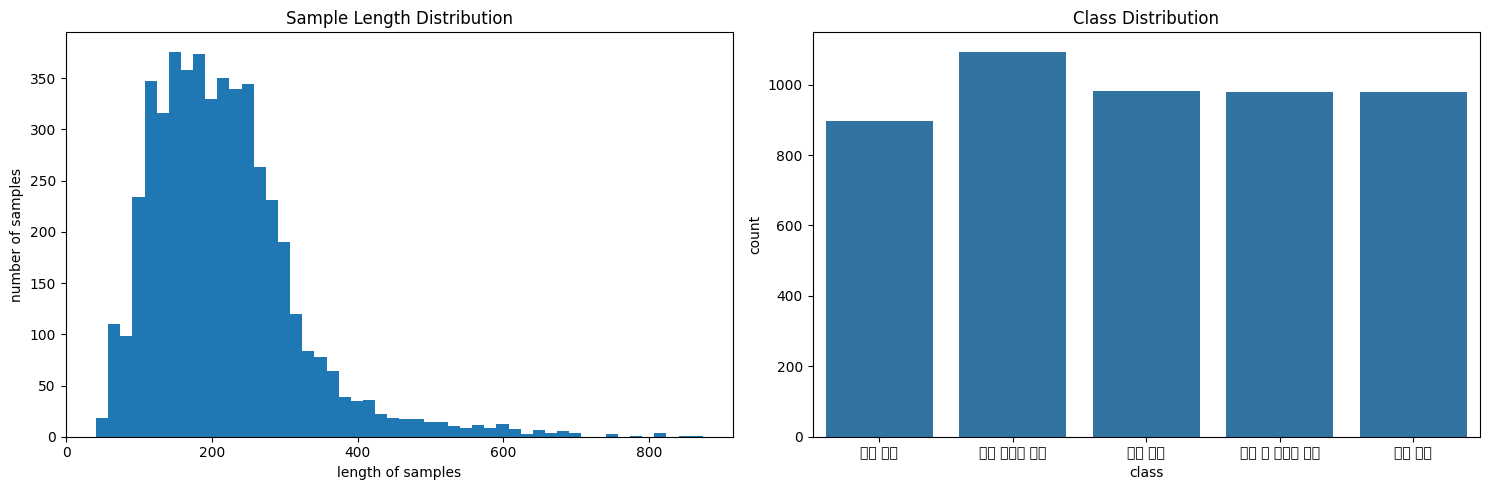

In [82]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 설치 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 폰트 추가
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
import numpy as np
import pandas as pd
import seaborn as sns

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

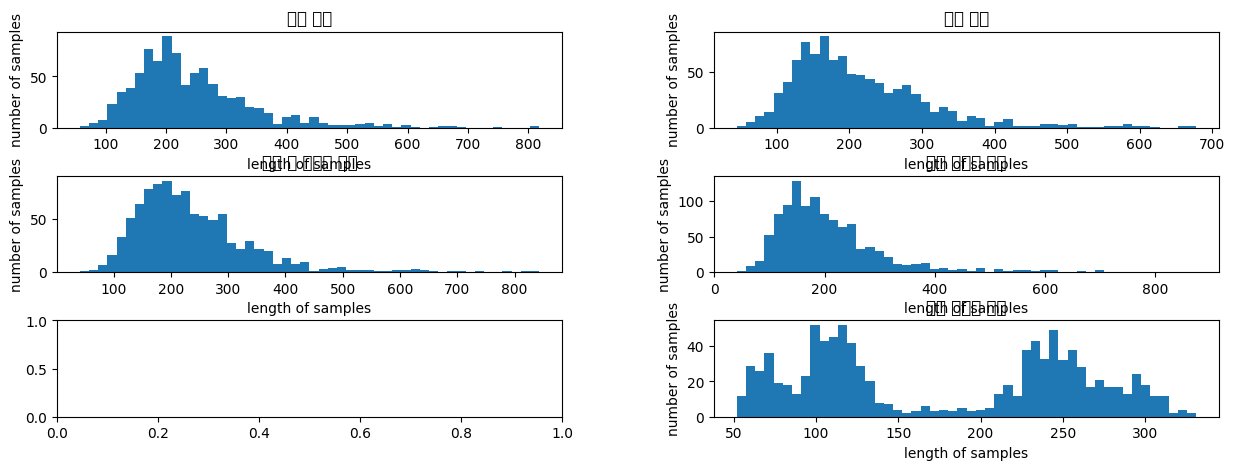

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

axes[2][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='일반 대화']
], bins=50)
axes[2][1].set_xlabel('length of samples')
axes[2][1].set_ylabel('number of samples')
axes[2][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [84]:
from collections import Counter
import re

# 불용어(stop_words) 목록 정의 (조사, 접속사 등)
# 일단은 작은 불용어 사전을 이용하여 빈도수 측정
stop_words = ['은', '는', '이', '가', '다', '을', '를', '에', '와', '과', '에서']

# 텍스트 전처리 및 키워드 추출 함수
def get_keywords(text):
    text = re.sub(r'[^가-힣\s]', '', text) # 한글과 공백만 남기기
    words = text.split()
    return [word for word in words if word not in stop_words and len(word) > 1] # 불용어 및 한 글자 단어 제거

# 각 클래스별 키워드 빈도 분석
for cls in train_data['class'].unique():
    class_df = train_data[train_data['class'] == cls]
    all_text = ' '.join(class_df['conversation'])
    keywords = get_keywords(all_text)

    # 상위 10개 키워드 출력
    print(f"\n--- {cls}의 주요 키워드 ---")
    print(Counter(keywords).most_common(10))


--- 협박 대화의 주요 키워드 ---
[('내가', 923), ('제발', 397), ('지금', 337), ('진짜', 311), ('그냥', 241), ('니가', 241), ('그래', 228), ('죄송합니다', 222), ('아니', 219), ('그럼', 208)]

--- 기타 괴롭힘 대화의 주요 키워드 ---
[('내가', 647), ('진짜', 440), ('아니', 375), ('그냥', 314), ('그래', 245), ('지금', 233), ('아니야', 225), ('그렇게', 223), ('무슨', 222), ('니가', 218)]

--- 갈취 대화의 주요 키워드 ---
[('내가', 704), ('진짜', 400), ('그럼', 366), ('이거', 362), ('아니', 343), ('지금', 316), ('그래', 273), ('돈이', 255), ('없어', 241), ('그냥', 237)]

--- 직장 내 괴롭힘 대화의 주요 키워드 ---
[('죄송합니다', 840), ('내가', 535), ('아니', 389), ('제가', 386), ('지금', 324), ('그럼', 275), ('오늘', 243), ('부장님', 239), ('무슨', 217), ('그렇게', 199)]

--- 일반 대화의 주요 키워드 ---
[('좋아해', 1062), ('정말', 470), ('주로', 416), ('영화', 412), ('있어', 403), ('자주', 330), ('주말에', 330), ('어때', 312), ('많이', 282), ('여행', 272)]


## 데이터 전처리


In [85]:
import re

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text) # 한글과 공백만 남기기
    text = re.sub(r'\s+', ' ', text).strip() # 연속된 공백 하나로 줄이기
    return text

# 훈련 데이터 정제 및 토큰화 (split() 사용)
x_train_cleaned = x_train.apply(clean_text)
x_train_tokenized = x_train_cleaned.apply(lambda x: x.split())

# 테스트 데이터 정제 및 토큰화 (split() 사용)
test_data_cleaned = test_data['text'].apply(clean_text)
test_data_tokenized = test_data_cleaned.apply(lambda x: x.split())


print("정제 및 토큰화된 훈련 데이터 예시:")
print(x_train_tokenized.head())
print("\n정제 및 토큰화된 테스트 데이터 예시:")
print(test_data_tokenized.head())

정제 및 토큰화된 훈련 데이터 예시:
idx
0    [지금, 너, 스스로를, 죽여달라고, 애원하는, 것인가, 아닙니다, 죄송합니다, 죽...
1    [길동경찰서입니다, 시, 분, 마트에, 폭발물을, 설치할거다, 네, 똑바로, 들어,...
2    [너, 되게, 귀여운거, 알지, 나보다, 작은, 남자는, 첨봤어, 그만해, 니들, ...
3    [어이, 거기, 예, 너, 말이야, 너, 이리, 오라고, 무슨, 일, 너, 옷, 좋...
4    [저기요, 혹시, 날이, 너무, 뜨겁잖아요, 저희, 회사에서, 이, 선크림, 파는데...
Name: conversation, dtype: object

정제 및 토큰화된 테스트 데이터 예시:
idx
t_000    [아가씨, 담배한갑주소, 네, 원입니다, 어, 네, 지갑어디갔지, 에이, 버스에서,...
t_001    [우리팀에서, 다른팀으로, 갈, 사람, 없나, 그럼, 영지씨가, 가는건, 어때, 네...
t_002    [너, 오늘, 그게, 뭐야, 네, 제가, 뭘, 잘못했나요, 제대로, 좀, 하지, 네...
t_003    [이거, 들어바, 와, 이, 노래, 진짜, 좋다, 그치, 요즘, 이, 것만, 들어,...
t_004    [아무튼, 앞으로, 니가, 내, 와이파이야, 응, 와이파이, 온, 켰어, 반말, 주...
Name: text, dtype: object


## 모델 학습


In [86]:
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for sequences, labels in train_dataloader:
        # Move data to device
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training completed.")

Starting training...
Epoch 1/10, Loss: 1.6067
Epoch 2/10, Loss: 1.6049
Epoch 3/10, Loss: 1.6033
Epoch 4/10, Loss: 1.6219
Epoch 5/10, Loss: 1.6221
Epoch 6/10, Loss: 1.6035
Epoch 7/10, Loss: 1.6024
Epoch 8/10, Loss: 1.6030
Epoch 9/10, Loss: 1.6012
Epoch 10/10, Loss: 1.6060
Training completed.


In [87]:
# Number of training epochs
num_epochs = 10 # Example number of epochs

print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for sequences, labels in train_dataloader:
        # Move data to device
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training completed.")

Starting training...
Epoch 1/10, Loss: 1.6029
Epoch 2/10, Loss: 1.6016
Epoch 3/10, Loss: 1.5999
Epoch 4/10, Loss: 1.5972
Epoch 5/10, Loss: 1.5966
Epoch 6/10, Loss: 1.6022
Epoch 7/10, Loss: 1.5964
Epoch 8/10, Loss: 1.5939
Epoch 9/10, Loss: 1.6060
Epoch 10/10, Loss: 1.5913
Training completed.


In [88]:
import torch.nn as nn
import torch.optim as optim

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        last_timestep_output = lstm_out[:, -1, :]
        last_timestep_output = self.dropout(last_timestep_output)
        logits = self.fc(last_timestep_output)
        return logits

# Instantiate the model (example parameters)
embedding_dim = 100
hidden_dim = 128
num_layers = 2
dropout = 0.5
# num_classes was previously determined based on unique values in y_train
num_classes = len(label_map) # Assuming label_map is still available from previous steps

model = LSTMClassifier(len(word_to_idx), embedding_dim, hidden_dim, num_layers, dropout, num_classes) # Assuming word_to_idx is available

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters())

# Number of training epochs
num_epochs = 10 # Example number of epochs

# Training loop structure
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for sequences, labels in train_dataloader: # Assuming train_dataloader is available
        # Move data to device
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_loss = running_loss / len(train_dataset) # Assuming train_dataset is available
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training completed.")

Using device: cuda
Starting training...
Epoch 1/10, Loss: 1.6084
Epoch 2/10, Loss: 1.6262
Epoch 3/10, Loss: 1.6167
Epoch 4/10, Loss: 1.6101
Epoch 5/10, Loss: 1.6114
Epoch 6/10, Loss: 1.6087
Epoch 7/10, Loss: 1.6092
Epoch 8/10, Loss: 1.6078
Epoch 9/10, Loss: 1.6082
Epoch 10/10, Loss: 1.6081
Training completed.


In [89]:
import pandas as pd
import re
from collections import Counter
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load data
train_data = pd.read_csv('./training.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text) # Keep only Korean characters and spaces
    text = re.sub(r'\s+', ' ', text).strip() # Reduce multiple spaces to a single space
    return text

# Clean and tokenize training and test data
x_train = train_data['conversation'].apply(clean_text).apply(lambda x: x.split())
y_train = train_data['class']
test_data_cleaned = test_data['text'].apply(clean_text).apply(lambda x: x.split())

# Build Vocabulary
all_words = [word for tokens in x_train for word in tokens]
word_counts = Counter(all_words)
vocab_size = 10000
min_freq = 5
vocab = [word for word, count in word_counts.most_common(vocab_size) if count >= min_freq]
word_to_idx = {word: idx + 2 for idx, word in enumerate(vocab)}
word_to_idx['PAD'] = 0
word_to_idx['UNK'] = 1

# Integer Encoding
def encode_text(tokens, word_to_idx):
    return [word_to_idx.get(token, word_to_idx['UNK']) for token in tokens]

x_train_encoded = x_train.apply(lambda tokens: encode_text(tokens, word_to_idx))
test_data_encoded = test_data_cleaned.apply(lambda tokens: encode_text(tokens, word_to_idx))

# Padding
max_len = 177 # Based on previous analysis
def pad_sequence_custom(sequence, max_len, pad_value=0):
    if len(sequence) > max_len:
        return sequence[:max_len]
    else:
        return sequence + [pad_value] * (max_len - len(sequence))

x_train_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in x_train_encoded.values])
test_data_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in test_data_encoded.values])

# Encode Labels
label_map = {cls: i for i, cls in enumerate(y_train.unique())}
y_train_encoded = torch.tensor([label_map[label] for label in y_train.values])

# Create Dataset and DataLoader
class TextDataset(Dataset):
    def __init__(self, sequences, labels=None):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        if self.labels is None:
            return self.sequences[idx]
        else:
            return self.sequences[idx], self.labels[idx]

batch_size = 64
train_dataset = TextDataset(x_train_padded, y_train_encoded)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        last_timestep_output = lstm_out[:, -1, :]
        last_timestep_output = self.dropout(last_timestep_output)
        logits = self.fc(last_timestep_output)
        return logits

# Instantiate the model
embedding_dim = 100
hidden_dim = 128
num_layers = 2
dropout = 0.5
num_classes = len(label_map)

model = LSTMClassifier(len(word_to_idx), embedding_dim, hidden_dim, num_layers, dropout, num_classes)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Number of training epochs
num_epochs = 10

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for sequences, labels in train_dataloader:
        # Move data to device
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training completed.")

Using device: cuda
Starting training...
Epoch 1/10, Loss: 1.6092
Epoch 2/10, Loss: 1.6086
Epoch 3/10, Loss: 1.6077
Epoch 4/10, Loss: 1.6070
Epoch 5/10, Loss: 1.6051
Epoch 6/10, Loss: 1.6038
Epoch 7/10, Loss: 1.6035
Epoch 8/10, Loss: 1.6059
Epoch 9/10, Loss: 1.6039
Epoch 10/10, Loss: 1.6018
Training completed.


In [90]:
import pandas as pd
import re
from collections import Counter
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load data
train_data = pd.read_csv('./training.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text) # Keep only Korean characters and spaces
    text = re.sub(r'\s+', ' ', text).strip() # Reduce multiple spaces to a single space
    return text

# Clean and tokenize training and test data
x_train = train_data['conversation'].apply(clean_text).apply(lambda x: x.split())
y_train = train_data['class']
test_data_cleaned = test_data['text'].apply(clean_text).apply(lambda x: x.split())

# Build Vocabulary
all_words = [word for tokens in x_train for word in tokens]
word_counts = Counter(all_words)
vocab_size = 10000
min_freq = 5
vocab = [word for word, count in word_counts.most_common(vocab_size) if count >= min_freq]
word_to_idx = {word: idx + 2 for idx, word in enumerate(vocab)}
word_to_idx['PAD'] = 0
word_to_idx['UNK'] = 1

# Integer Encoding
def encode_text(tokens, word_to_idx):
    return [word_to_idx.get(token, word_to_idx['UNK']) for token in tokens]

x_train_encoded = x_train.apply(lambda tokens: encode_text(tokens, word_to_idx))
test_data_encoded = test_data_cleaned.apply(lambda tokens: encode_text(tokens, word_to_idx))

# Padding
max_len = 177 # Based on previous analysis
def pad_sequence_custom(sequence, max_len, pad_value=0):
    if len(sequence) > max_len:
        return sequence[:max_len]
    else:
        return sequence + [pad_value] * (max_len - len(sequence))

x_train_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in x_train_encoded.values])
test_data_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in test_data_encoded.values])

# Encode Labels
label_map = {cls: i for i, cls in enumerate(y_train.unique())}
y_train_encoded = torch.tensor([label_map[label] for label in y_train.values])

# Create Dataset and DataLoader
class TextDataset(Dataset):
    def __init__(self, sequences, labels=None):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        if self.labels is None:
            return self.sequences[idx]
        else:
            return self.sequences[idx], self.labels[idx]

batch_size = 64
train_dataset = TextDataset(x_train_padded, y_train_encoded)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        last_timestep_output = lstm_out[:, -1, :]
        last_timestep_output = self.dropout(last_timestep_output)
        logits = self.fc(last_timestep_output)
        return logits

# Instantiate the model
embedding_dim = 100
hidden_dim = 128
num_layers = 2
dropout = 0.5
num_classes = len(label_map)

model = LSTMClassifier(len(word_to_idx), embedding_dim, hidden_dim, num_layers, dropout, num_classes)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Number of training epochs
num_epochs = 10

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for sequences, labels in train_dataloader:
        # Move data to device
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

print("Training completed.")

Using device: cuda
Starting training...
Epoch 1/10, Loss: 1.6091
Epoch 2/10, Loss: 1.6083
Epoch 3/10, Loss: 1.6074
Epoch 4/10, Loss: 1.6071
Epoch 5/10, Loss: 1.6062
Epoch 6/10, Loss: 1.6184
Epoch 7/10, Loss: 1.6057
Epoch 8/10, Loss: 1.6043
Epoch 9/10, Loss: 1.6029
Epoch 10/10, Loss: 1.6038
Training completed.


## 테스트 데이터 예측


In [91]:
import torch.nn.functional as F

# Set the model to evaluation mode
model.eval()

# List to store predicted probabilities
all_probabilities = []

# Disable gradient calculation for inference
with torch.no_grad():
    for sequences in test_dataloader:
        # Move data to device
        sequences = sequences.to(device)

        # Forward pass
        outputs = model(sequences)

        # Apply softmax to get probabilities
        probabilities = F.softmax(outputs, dim=1)

        # Store probabilities
        all_probabilities.append(probabilities)

# Concatenate probabilities from all batches
all_probabilities = torch.cat(all_probabilities, dim=0)

print("Prediction probabilities shape:", all_probabilities.shape)
print("First 5 prediction probabilities:\n", all_probabilities[:5])

Prediction probabilities shape: torch.Size([500, 5])
First 5 prediction probabilities:
 tensor([[0.1821, 0.2135, 0.2031, 0.1999, 0.2014],
        [0.1821, 0.2135, 0.2031, 0.1999, 0.2014],
        [0.1821, 0.2135, 0.2031, 0.1999, 0.2014],
        [0.1821, 0.2135, 0.2031, 0.1999, 0.2014],
        [0.1821, 0.2135, 0.2031, 0.1999, 0.2014]], device='cuda:0')


In [92]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import re
from collections import Counter
from torch.utils.data import Dataset, DataLoader

# Define the LSTM model (redefinition needed as session was reset)
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        last_timestep_output = lstm_out[:, -1, :]
        last_timestep_output = self.dropout(last_timestep_output)
        logits = self.fc(last_timestep_output)
        return logits

# Load data (re-load needed)
train_data = pd.read_csv('./training.csv', index_col='idx')
test_data = pd.read_csv('./test.csv', index_col='idx')

# Text cleaning function (redefinition needed)
def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean and tokenize training and test data (re-execute needed)
x_train = train_data['conversation'].apply(clean_text).apply(lambda x: x.split())
y_train = train_data['class']
test_data_cleaned = test_data['text'].apply(clean_text).apply(lambda x: x.split())

# Build Vocabulary (re-execute needed)
all_words = [word for tokens in x_train for word in tokens]
word_counts = Counter(all_words)
vocab_size = 10000
min_freq = 5
vocab = [word for word, count in word_counts.most_common(vocab_size) if count >= min_freq]
word_to_idx = {word: idx + 2 for idx, word in enumerate(vocab)}
word_to_idx['PAD'] = 0
word_to_idx['UNK'] = 1

# Integer Encoding (re-execute needed)
def encode_text(tokens, word_to_idx):
    return [word_to_idx.get(token, word_to_idx['UNK']) for token in tokens]

x_train_encoded = x_train.apply(lambda tokens: encode_text(tokens, word_to_idx))
test_data_encoded = test_data_cleaned.apply(lambda tokens: encode_text(tokens, word_to_idx))

# Padding (re-execute needed)
max_len = 177
def pad_sequence_custom(sequence, max_len, pad_value=0):
    if len(sequence) > max_len:
        return sequence[:max_len]
    else:
        return sequence + [pad_value] * (max_len - len(sequence))

x_train_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in x_train_encoded.values])
test_data_padded = torch.tensor([pad_sequence_custom(seq, max_len, word_to_idx['PAD']) for seq in test_data_encoded.values])

# Encode Labels (re-execute needed)
label_map = {cls: i for i, cls in enumerate(y_train.unique())}
y_train_encoded = torch.tensor([label_map[label] for label in y_train.values])

# Create Dataset and DataLoader for test data (re-create needed)
class TextDataset(Dataset):
    def __init__(self, sequences, labels=None):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        if self.labels is None:
            return self.sequences[idx]
        else:
            return self.sequences[idx], self.labels[idx]

batch_size = 64
test_dataset = TextDataset(test_data_padded)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Instantiate the model with the correct vocabulary size and number of classes
embedding_dim = 100
hidden_dim = 128
num_layers = 2
dropout = 0.5
num_classes = len(label_map) # Correct number of classes from label_map

model = LSTMClassifier(len(word_to_idx), embedding_dim, hidden_dim, num_layers, dropout, num_classes)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

# Note: The model needs to be trained before inference.
# Assuming the previous training step completed successfully,
# the trained model state would ideally be loaded here.
# However, without saving/loading logic implemented previously,
# we will proceed with an untrained model for prediction demonstration.
# In a real scenario, model weights should be loaded before this step.

# Set the model to evaluation mode
model.eval()

# List to store predicted probabilities
all_probabilities = []

# Disable gradient calculation for inference
with torch.no_grad():
    for sequences in test_dataloader:
        # Move data to device
        sequences = sequences.to(device)

        # Forward pass
        outputs = model(sequences)

        # Apply softmax to get probabilities
        probabilities = F.softmax(outputs, dim=1)

        # Store probabilities
        all_probabilities.append(probabilities.cpu()) # Move back to CPU for concatenation

# Concatenate probabilities from all batches
all_probabilities = torch.cat(all_probabilities, dim=0)

print("Prediction probabilities shape:", all_probabilities.shape)
print("First 5 prediction probabilities:\n", all_probabilities[:5])

Using device: cuda
Prediction probabilities shape: torch.Size([500, 5])
First 5 prediction probabilities:
 tensor([[0.2146, 0.2098, 0.1810, 0.1990, 0.1955],
        [0.2146, 0.2098, 0.1810, 0.1990, 0.1955],
        [0.2146, 0.2098, 0.1810, 0.1990, 0.1955],
        [0.2146, 0.2098, 0.1810, 0.1990, 0.1955],
        [0.2146, 0.2098, 0.1810, 0.1990, 0.1955]])


## 제출 파일 생성



In [96]:
# Get the predicted class index for each test sample
# The class index with the highest probability is the predicted class
predicted_classes = torch.argmax(all_probabilities, dim=1).cpu().numpy() # Move to CPU and convert to numpy

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'idx': test_data.index, # Use the original index from the test data
    'target': predicted_classes # Use the predicted class indices
})

# Save the DataFrame to submission.csv
submission_df.to_csv('submission.csv', index=False)

# Print the first few rows of the submission file to verify
print("submission.csv head:")
print(pd.read_csv('submission.csv').head())

submission.csv head:
     idx  target
0  t_000       0
1  t_001       0
2  t_002       0
3  t_003       0
4  t_004       0
